# CAPSTONE PROJECT

**Delivery Center: Food & Goods orders in Brazil (Submitted by: Deschie Tri Aksara)**

**Deskripsi**

Dataset ini merupakan record operasional pusat pengiriman di Brazil. Pusat Pengiriman adalah platform yang mengintegrasikan pengecer dan pasar, menciptakan ekosistem yang sehat untuk penjualan barang (produk) dan makanan (makanan) di ritel Brasil. Datadet berisi data pesanan dan pengiriman yang diproses oleh Pusat Pengiriman antara bulan Januari dan April 2021.


## Connect Colab to GDrive

In [2]:
# Mengakses link ke google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## IMPORT PACKAGES

In [3]:
# Import Packages
import pandas as pd
import os
import sqlite3
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
# Kemudian kita definisikan path folder dimana file database kita disimpan
path = '/content/gdrive/MyDrive/Narasio Data/Meet 12/' #silahkan masukkan path sesuai dengan letak data di folder drive masing-masing

In [5]:
# untuk mengecek ada file apa saja didalam path yang digunakan
os.listdir(path)

['Food and Goods Orders.db',
 'Meeting 12 Junior Data Analyst - Capstone Project PPT.pdf',
 'Data Description Food _ Goods orders in Brazil.gdoc',
 'Food & Goods orders in Brazil - Capstone 7.ipynb']

## Connect SQLite to Python

In [6]:
# Kemudian kembali membuat connection ke database yang udah ada
conn = sqlite3.connect(path + 'Food and Goods Orders.db')

# Membuat cursor object untuk memanggil SQL statement
cur = conn.cursor()

In [7]:
# Kemudian kita dapat execute SQL statement. Kali ini kita akan mengecek terdapat tabel apa saja di 'Food and Goods Orders.db'
cur.execute("""
              SELECT 
                  name 
              FROM sqlite_master 
              WHERE type='table'
            """)

print(cur.fetchall())

[('channels',), ('deliveries',), ('drivers',), ('hubs',), ('orders',), ('payments',), ('stores',)]


## Data Preparation Using SQL

In [8]:
#1 mendapatkan data channels
df_channels = pd.read_sql_query("""
                                  SELECT
                                    *
                                  FROM channels
                                """, conn)
df_channels

,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL
3,4,FACE PLACE,OWN CHANNEL
4,5,FOOD PLACE,MARKETPLACE
5,6,STORE PLACE,OWN CHANNEL
6,7,BERLIN PLACE,OWN CHANNEL
7,8,MADRID PLACE,OWN CHANNEL
8,9,THINK PLACE,OWN CHANNEL
9,10,LISBON PLACE,OWN CHANNEL


In [9]:
#2 mendapatkan data deliveries
df_deliveries = pd.read_sql_query("""
                                  SELECT
                                    *
                                  FROM deliveries
                                """, conn)
df_deliveries

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2177725,68409030,NaN,1723.0,CANCELLED
1,2180133,68410055,10239.0,1035.0,DELIVERED
2,2174663,68412721,8378.0,5714.0,DELIVERED
3,2174658,68413340,8378.0,5199.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED
...,...,...,...,...,...
7173,2191608,69101545,491.0,2409.0,DELIVERED
7174,2191439,69101700,16832.0,427.0,DELIVERED
7175,2191475,69101704,760.0,2233.0,DELIVERED
7176,2191329,69101730,9600.0,481.0,DELIVERED


In [10]:
#3 mendapatkan data drivers
df_drivers = pd.read_sql_query("""
                                  SELECT
                                    *
                                  FROM drivers
                                """, conn)
df_drivers

,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE
3,143,BIKER,FREELANCE
4,148,MOTOBOY,FREELANCE
...,...,...,...
4819,66260,MOTOBOY,FREELANCE
4820,66271,BIKER,FREELANCE
4821,66457,MOTOBOY,LOGISTIC OPERATOR
4822,66459,MOTOBOY,LOGISTIC OPERATOR


In [11]:
#4 mendapatkan data hubs
df_hubs = pd.read_sql_query("""
                              SELECT
                                *
                              FROM hubs
                            """, conn)
df_hubs

,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382
3,5,FUNK SHOPPING,RIO DE JANEIRO,RJ,-23.000750,-43.318282
4,8,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.921475,-43.234774
5,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
6,16,PEOPLE SHOPPING,RIO DE JANEIRO,RJ,-23.017472,-43.479939
7,17,SMALL SHOPPING,SÃO PAULO,SP,-23.592004,-46.636503
8,18,STAR SHOPPING,RIO DE JANEIRO,RJ,-22.945495,-43.182181
9,20,PURPLE SHOPPING,RIO DE JANEIRO,RJ,-22.996848,-43.359636


In [12]:
#5 mendapatkan data orders
df_orders = pd.read_sql_query("""
                              SELECT
                                *
                              FROM orders
                            """, conn)
df_orders

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_in_expedition,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.70,0.0,NaN,0,1,1,1,2021,1/1/2021 12:01:36 AM,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.70,0.0,NaN,0,4,1,1,2021,1/1/2021 12:04:26 AM,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.50,0.0,NaN,0,13,1,1,2021,1/1/2021 12:13:07 AM,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.90,0.0,NaN,0,19,1,1,2021,1/1/2021 12:19:15 AM,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.90,0.0,NaN,0,26,1,1,2021,1/1/2021 12:26:25 AM,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,69101545,6,15,69101545,69101545,FINISHED,55.80,5.9,8.83,14,36,4,1,2021,1/4/2021 2:36:23 PM,1/4/2021 2:37:14 PM,1/4/2021 3:05:39 PM,1/4/2021 3:07:29 PM,1/4/2021 3:08:35 PM,1/4/2021 3:10:40 PM,None,1/4/2021 3:35:19 PM,1.83,2.08,29.27,2.93,5.02,24.63,58.93
6996,69101700,236,5,69101700,69101700,FINISHED,90.30,11.9,3.00,14,36,4,1,2021,1/4/2021 2:36:46 PM,1/4/2021 2:37:12 PM,1/4/2021 2:49:46 PM,1/4/2021 2:51:19 PM,1/4/2021 2:55:17 PM,1/4/2021 2:56:38 PM,None,1/4/2021 3:11:31 PM,1.55,1.33,13.00,5.52,6.87,14.88,34.75
6997,69101704,707,5,69101704,69101704,FINISHED,71.95,11.9,5.85,14,36,4,1,2021,1/4/2021 2:36:46 PM,1/4/2021 2:37:13 PM,1/4/2021 2:52:09 PM,1/4/2021 2:55:40 PM,1/4/2021 2:55:46 PM,1/4/2021 2:59:24 PM,None,1/4/2021 3:18:45 PM,3.52,3.63,15.38,3.60,7.25,19.35,41.98
6998,69101730,3097,5,69101730,69101730,FINISHED,28.40,0.0,6.00,14,36,4,1,2021,1/4/2021 2:36:49 PM,1/4/2021 2:37:11 PM,1/4/2021 2:37:47 PM,1/4/2021 2:40:56 PM,1/4/2021 2:40:57 PM,1/4/2021 2:46:17 PM,None,1/4/2021 2:58:54 PM,3.15,5.33,0.97,3.17,8.50,12.62,22.08


In [13]:
#6 mendapatkan data payments
df_payments = pd.read_sql_query("""
                              SELECT
                                *
                              FROM payments
                            """, conn)
df_payments

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID
...,...,...,...,...,...,...
7242,4446441,69101700,102.20,2.76,ONLINE,PAID
7243,4446442,69101704,83.85,2.26,ONLINE,PAID
7244,4446443,69101730,18.40,0.28,ONLINE,PAID
7245,4446444,69101730,10.00,0.00,VOUCHER,PAID


In [14]:
#7 mendapatkan data stores
df_stores = pd.read_sql_query("""
                              SELECT
                                *
                              FROM stores
                            """, conn)
df_stores

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822
...,...,...,...,...,...,...,...
946,4669,21,CIRUMOI,GOOD,29.0,-23.550407,-46.721291
947,4671,25,CIRUMOI,GOOD,49.9,-23.570765,-46.642043
948,4675,13,SIMUI LIMOI,GOOD,29.0,-22.887521,-43.283366
949,4676,75,PAMACIS,GOOD,49.9,-25.477073,-49.289660


### Joining Tables

In [25]:
df_join = pd.read_sql_query("""
                    SELECT
                      o.order_id,
                      o.store_id,
                      store_name,
                      store_segment,
                      store_latitude,
                      store_longitude,
                      o.channel_id,
                      channel_name,
                      channel_type,
                      o.payment_order_id,
                      payment_amount,
                      payment_fee,
                      payment_method,
                      payment_status,
                      o.delivery_order_id,
                      delivery_distance_meters,
                      delivery_status,
                      d.driver_id,
                      driver_modal,
                      driver_type,
                      order_status,
                      order_amount,
                      order_moment_created,
                      order_moment_in_expedition,
                      order_moment_finished,
                      h.hub_id,
                      hub_name,
                      hub_city,
                      hub_state,
                      hub_latitude,
                      hub_longitude
                    FROM orders o
                    LEFT JOIN stores s
                      ON o.store_id = s.store_id
                    LEFT JOIN hubs h
                      ON s.hub_id = h.hub_id
                    LEFT JOIN channels c
                      ON o.channel_id = c.channel_id
                    INNER JOIN payments p
                      ON o.payment_order_id = p.payment_order_id
                    INNER JOIN deliveries d
                      ON o.delivery_order_id = d.delivery_order_id
                    LEFT JOIN drivers dr
                      ON d.driver_id = dr.driver_id
                  """, conn)
df_join

,order_id,store_id,store_name,store_segment,store_latitude,store_longitude,channel_id,channel_name,channel_type,payment_order_id,payment_amount,payment_fee,payment_method,payment_status,delivery_order_id,delivery_distance_meters,delivery_status,driver_id,driver_modal,driver_type,order_status,order_amount,order_moment_created,order_moment_in_expedition,order_moment_finished,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,68410055,2181,LILI CISRUMACS,GOOD,-22.887521,-43.283366,35,BRAZIL PLACE,MARKETPLACE,68410055,118.44,0.00,VOUCHER,PAID,68410055,1035.0,DELIVERED,10239.0,BIKER,FREELANCE,FINISHED,394.80,1/1/2021 2:32:51 AM,1/2/2021 6:31:15 PM,1/2/2021 6:57:34 PM,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
1,68410055,2181,LILI CISRUMACS,GOOD,-22.887521,-43.283366,35,BRAZIL PLACE,MARKETPLACE,68410055,394.81,7.90,ONLINE,PAID,68410055,1035.0,DELIVERED,10239.0,BIKER,FREELANCE,FINISHED,394.80,1/1/2021 2:32:51 AM,1/2/2021 6:31:15 PM,1/2/2021 6:57:34 PM,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
2,68412721,631,IUMPICA,FOOD,-23.595775,-46.685984,5,FOOD PLACE,MARKETPLACE,68412721,206.95,5.59,ONLINE,PAID,68412721,5714.0,DELIVERED,8378.0,MOTOBOY,FREELANCE,FINISHED,195.05,1/1/2021 2:12:11 PM,1/1/2021 2:39:05 PM,1/1/2021 4:12:36 PM,28,RAP SHOPPING,SÃO PAULO,SP,-23.595001,-46.685984
3,68413340,631,IUMPICA,FOOD,-23.595775,-46.685984,5,FOOD PLACE,MARKETPLACE,68413340,58.80,1.59,ONLINE,PAID,68413340,5199.0,DELIVERED,8378.0,MOTOBOY,FREELANCE,FINISHED,46.90,1/1/2021 2:14:51 PM,1/1/2021 2:39:02 PM,1/1/2021 3:31:54 PM,28,RAP SHOPPING,SÃO PAULO,SP,-23.595001,-46.685984
4,68414018,3265,EAVAMI FIGOI,FOOD,-23.507105,-46.718197,5,FOOD PLACE,MARKETPLACE,68414018,45.80,0.92,ONLINE,PAID,68414018,3746.0,DELIVERED,10463.0,MOTOBOY,LOGISTIC OPERATOR,FINISHED,45.80,1/1/2021 2:17:31 PM,1/1/2021 2:55:16 PM,1/1/2021 3:09:20 PM,37,RIVER SHOPPING,SÃO PAULO,SP,-23.507105,-46.718197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,69101700,236,IUMPICA,FOOD,-22.885820,-43.279218,5,FOOD PLACE,MARKETPLACE,69101700,102.20,2.76,ONLINE,PAID,69101700,427.0,DELIVERED,16832.0,BIKER,FREELANCE,FINISHED,90.30,1/4/2021 2:36:46 PM,1/4/2021 2:55:17 PM,1/4/2021 3:11:31 PM,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
7575,69101704,707,IUMPICA,FOOD,-23.579067,-46.594006,5,FOOD PLACE,MARKETPLACE,69101704,83.85,2.26,ONLINE,PAID,69101704,2233.0,DELIVERED,760.0,MOTOBOY,FREELANCE,FINISHED,71.95,1/4/2021 2:36:46 PM,1/4/2021 2:55:46 PM,1/4/2021 3:18:45 PM,33,COFFEE SHOPPING,SÃO PAULO,SP,-23.579067,-46.592820
7576,69101730,3097,PIGUE PIPACO,FOOD,-23.563758,-46.652621,5,FOOD PLACE,MARKETPLACE,69101730,10.00,0.00,VOUCHER,PAID,69101730,481.0,DELIVERED,9600.0,BIKER,FREELANCE,FINISHED,28.40,1/4/2021 2:36:49 PM,1/4/2021 2:40:57 PM,1/4/2021 2:58:54 PM,26,SQL SHOPPING,SÃO PAULO,SP,-23.563019,-46.652621
7577,69101730,3097,PIGUE PIPACO,FOOD,-23.563758,-46.652621,5,FOOD PLACE,MARKETPLACE,69101730,18.40,0.28,ONLINE,PAID,69101730,481.0,DELIVERED,9600.0,BIKER,FREELANCE,FINISHED,28.40,1/4/2021 2:36:49 PM,1/4/2021 2:40:57 PM,1/4/2021 2:58:54 PM,26,SQL SHOPPING,SÃO PAULO,SP,-23.563019,-46.652621


## PROBLEM STATEMENT

*   Berapa jumlah customer dan mitra saat ini?
*   Apakah ada penurunan trend pengiriman dari waktu ke waktu?
*   Apa nama dan kota hub yang paling mendapatkan banyak pemesanan?
*   Channel mana yang paling banyak terjadi transaksi?
*   Berapa rata-rata jarak tempuh pengiriman?
*   Berapakah nilai pesanan / store berdasarkan (min, max, avg, std)?
*   Top 5 home store di segmen food dan good
*   Berapa prosentase jumlah pesanan good dan order?
*   Bagaimana persebaran driver type berdasarkan driver modal?

## DATA CLEANSING

In [26]:
df_join.dtypes

order_id                        int64
store_id                        int64
store_name                     object
store_segment                  object
store_latitude                float64
store_longitude               float64
channel_id                      int64
channel_name                   object
channel_type                   object
payment_order_id                int64
payment_amount                float64
payment_fee                   float64
payment_method                 object
payment_status                 object
delivery_order_id               int64
delivery_distance_meters      float64
delivery_status                object
driver_id                     float64
driver_modal                   object
driver_type                    object
order_status                   object
order_amount                  float64
order_moment_created           object
order_moment_in_expedition     object
order_moment_finished          object
hub_id                          int64
hub_name    

In [27]:
# Mengubah int menjadi string_one by one
df_join['order_id'] = df_join['order_id'].astype(str)
df_join['store_id'] = df_join['store_id'].astype(str)
df_join['channel_id'] = df_join['channel_id'].astype(str)
df_join['driver_id'] = df_join['driver_id'].astype(str)
df_join['hub_id'] = df_join['hub_id'].astype(str)

In [28]:
# Mengubah string menjadi datetime_looping
change_columns_join = ['order_moment_created','order_moment_in_expedition', 'order_moment_finished']
for cc in change_columns_join :
  df_join[cc] = pd.to_datetime(df_join[cc])

In [29]:
df_join.dtypes

order_id                              object
store_id                              object
store_name                            object
store_segment                         object
store_latitude                       float64
store_longitude                      float64
channel_id                            object
channel_name                          object
channel_type                          object
payment_order_id                       int64
payment_amount                       float64
payment_fee                          float64
payment_method                        object
payment_status                        object
delivery_order_id                      int64
delivery_distance_meters             float64
delivery_status                       object
driver_id                             object
driver_modal                          object
driver_type                           object
order_status                          object
order_amount                         float64
order_mome

In [30]:
# Mengecek berapa jumlah null value pada masing masing kolom. 
jumlah_missing = pd.isnull(df_join).sum()
jumlah_missing

order_id                        0
store_id                        0
store_name                      0
store_segment                   0
store_latitude                  6
store_longitude                 6
channel_id                      0
channel_name                    0
channel_type                    0
payment_order_id                0
payment_amount                  0
payment_fee                     0
payment_method                  0
payment_status                  0
delivery_order_id               0
delivery_distance_meters        0
delivery_status                 0
driver_id                       0
driver_modal                  110
driver_type                   110
order_status                    0
order_amount                    0
order_moment_created            0
order_moment_in_expedition    913
order_moment_finished           2
hub_id                          0
hub_name                        0
hub_city                        0
hub_state                       0
hub_latitude  

In [31]:
# Menghapus missing value dengan drop baris yang missing
df_join = df_join.dropna(axis=0, how="any")

In [33]:
# Cek kembali apakah masih terdapat missing value
pd.isnull(df_join).sum()

order_id                      0
store_id                      0
store_name                    0
store_segment                 0
store_latitude                0
store_longitude               0
channel_id                    0
channel_name                  0
channel_type                  0
payment_order_id              0
payment_amount                0
payment_fee                   0
payment_method                0
payment_status                0
delivery_order_id             0
delivery_distance_meters      0
delivery_status               0
driver_id                     0
driver_modal                  0
driver_type                   0
order_status                  0
order_amount                  0
order_moment_created          0
order_moment_in_expedition    0
order_moment_finished         0
hub_id                        0
hub_name                      0
hub_city                      0
hub_state                     0
hub_latitude                  0
hub_longitude                 0
dtype: i

In [34]:
# Mengidentifikasi apakah terdapat duplicate value pada tabel dengan acuan kolom order_id
df_join[df_join["order_id"].duplicated(keep=False)].sort_values("order_id")

,order_id,store_id,store_name,store_segment,store_latitude,store_longitude,channel_id,channel_name,channel_type,payment_order_id,payment_amount,payment_fee,payment_method,payment_status,delivery_order_id,delivery_distance_meters,delivery_status,driver_id,driver_modal,driver_type,order_status,order_amount,order_moment_created,order_moment_in_expedition,order_moment_finished,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,68410055,2181,LILI CISRUMACS,GOOD,-22.887521,-43.283366,35,BRAZIL PLACE,MARKETPLACE,68410055,118.44,0.00,VOUCHER,PAID,68410055,1035.0,DELIVERED,10239.0,BIKER,FREELANCE,FINISHED,394.80,2021-01-01 02:32:51,2021-01-02 18:31:15,2021-01-02 18:57:34,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
1,68410055,2181,LILI CISRUMACS,GOOD,-22.887521,-43.283366,35,BRAZIL PLACE,MARKETPLACE,68410055,394.81,7.90,ONLINE,PAID,68410055,1035.0,DELIVERED,10239.0,BIKER,FREELANCE,FINISHED,394.80,2021-01-01 02:32:51,2021-01-02 18:31:15,2021-01-02 18:57:34,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
16,68416059,631,IUMPICA,FOOD,-23.595775,-46.685984,5,FOOD PLACE,MARKETPLACE,68416059,175.20,4.73,ONLINE,PAID,68416059,1450.0,DELIVERED,9996.0,BIKER,FREELANCE,FINISHED,163.30,2021-01-01 14:38:11,2021-01-01 15:12:44,2021-01-01 15:32:28,28,RAP SHOPPING,SÃO PAULO,SP,-23.595001,-46.685984
17,68416059,631,IUMPICA,FOOD,-23.595775,-46.685984,5,FOOD PLACE,MARKETPLACE,68416059,175.20,4.73,ONLINE,PAID,68416059,1450.0,DELIVERED,9996.0,BIKER,FREELANCE,FINISHED,163.30,2021-01-01 14:38:11,2021-01-01 15:12:44,2021-01-01 15:32:28,28,RAP SHOPPING,SÃO PAULO,SP,-23.595001,-46.685984
28,68417787,3528,ZIM M MUMEUR,FOOD,-22.927336,-43.572533,5,FOOD PLACE,MARKETPLACE,68417787,5.00,0.00,VOUCHER,PAID,68417787,2122.0,DELIVERED,26879.0,MOTOBOY,LOGISTIC OPERATOR,FINISHED,74.90,2021-01-01 15:01:54,2021-01-01 17:03:21,2021-01-01 17:27:26,51,RUBY SHOPPING,RIO DE JANEIRO,RJ,-22.923675,-43.567757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,69100289,1930,USPUMUI CIRAICI,FOOD,-22.996848,-43.361197,5,FOOD PLACE,MARKETPLACE,69100289,15.00,0.00,VOUCHER,PAID,69100289,1007.0,DELIVERED,9211.0,BIKER,FREELANCE,FINISHED,26.95,2021-01-04 14:32:26,2021-01-04 14:48:12,2021-01-04 14:57:56,20,PURPLE SHOPPING,RIO DE JANEIRO,RJ,-22.996848,-43.359636
7569,69101225,2112,PIMRIMA,FOOD,-22.926904,-43.572533,5,FOOD PLACE,MARKETPLACE,69101225,10.00,0.00,VOUCHER,PAID,69101225,2334.0,DELIVERED,11466.0,MOTOBOY,LOGISTIC OPERATOR,FINISHED,27.80,2021-01-04 14:34:56,2021-01-04 14:59:33,2021-01-04 15:15:52,51,RUBY SHOPPING,RIO DE JANEIRO,RJ,-22.923675,-43.567757
7570,69101225,2112,PIMRIMA,FOOD,-22.926904,-43.572533,5,FOOD PLACE,MARKETPLACE,69101225,24.70,0.37,ONLINE,PAID,69101225,2334.0,DELIVERED,11466.0,MOTOBOY,LOGISTIC OPERATOR,FINISHED,27.80,2021-01-04 14:34:56,2021-01-04 14:59:33,2021-01-04 15:15:52,51,RUBY SHOPPING,RIO DE JANEIRO,RJ,-22.923675,-43.567757
7576,69101730,3097,PIGUE PIPACO,FOOD,-23.563758,-46.652621,5,FOOD PLACE,MARKETPLACE,69101730,10.00,0.00,VOUCHER,PAID,69101730,481.0,DELIVERED,9600.0,BIKER,FREELANCE,FINISHED,28.40,2021-01-04 14:36:49,2021-01-04 14:40:57,2021-01-04 14:58:54,26,SQL SHOPPING,SÃO PAULO,SP,-23.563019,-46.652621


In [37]:
df_join2 = df_join.drop(['payment_amount', 'payment_fee'], axis=1)
df_join2

,order_id,store_id,store_name,store_segment,store_latitude,store_longitude,channel_id,channel_name,channel_type,payment_order_id,payment_method,payment_status,delivery_order_id,delivery_distance_meters,delivery_status,driver_id,driver_modal,driver_type,order_status,order_amount,order_moment_created,order_moment_in_expedition,order_moment_finished,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,68410055,2181,LILI CISRUMACS,GOOD,-22.887521,-43.283366,35,BRAZIL PLACE,MARKETPLACE,68410055,VOUCHER,PAID,68410055,1035.0,DELIVERED,10239.0,BIKER,FREELANCE,FINISHED,394.80,2021-01-01 02:32:51,2021-01-02 18:31:15,2021-01-02 18:57:34,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
1,68410055,2181,LILI CISRUMACS,GOOD,-22.887521,-43.283366,35,BRAZIL PLACE,MARKETPLACE,68410055,ONLINE,PAID,68410055,1035.0,DELIVERED,10239.0,BIKER,FREELANCE,FINISHED,394.80,2021-01-01 02:32:51,2021-01-02 18:31:15,2021-01-02 18:57:34,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
2,68412721,631,IUMPICA,FOOD,-23.595775,-46.685984,5,FOOD PLACE,MARKETPLACE,68412721,ONLINE,PAID,68412721,5714.0,DELIVERED,8378.0,MOTOBOY,FREELANCE,FINISHED,195.05,2021-01-01 14:12:11,2021-01-01 14:39:05,2021-01-01 16:12:36,28,RAP SHOPPING,SÃO PAULO,SP,-23.595001,-46.685984
3,68413340,631,IUMPICA,FOOD,-23.595775,-46.685984,5,FOOD PLACE,MARKETPLACE,68413340,ONLINE,PAID,68413340,5199.0,DELIVERED,8378.0,MOTOBOY,FREELANCE,FINISHED,46.90,2021-01-01 14:14:51,2021-01-01 14:39:02,2021-01-01 15:31:54,28,RAP SHOPPING,SÃO PAULO,SP,-23.595001,-46.685984
4,68414018,3265,EAVAMI FIGOI,FOOD,-23.507105,-46.718197,5,FOOD PLACE,MARKETPLACE,68414018,ONLINE,PAID,68414018,3746.0,DELIVERED,10463.0,MOTOBOY,LOGISTIC OPERATOR,FINISHED,45.80,2021-01-01 14:17:31,2021-01-01 14:55:16,2021-01-01 15:09:20,37,RIVER SHOPPING,SÃO PAULO,SP,-23.507105,-46.718197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,69101700,236,IUMPICA,FOOD,-22.885820,-43.279218,5,FOOD PLACE,MARKETPLACE,69101700,ONLINE,PAID,69101700,427.0,DELIVERED,16832.0,BIKER,FREELANCE,FINISHED,90.30,2021-01-04 14:36:46,2021-01-04 14:55:17,2021-01-04 15:11:31,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
7575,69101704,707,IUMPICA,FOOD,-23.579067,-46.594006,5,FOOD PLACE,MARKETPLACE,69101704,ONLINE,PAID,69101704,2233.0,DELIVERED,760.0,MOTOBOY,FREELANCE,FINISHED,71.95,2021-01-04 14:36:46,2021-01-04 14:55:46,2021-01-04 15:18:45,33,COFFEE SHOPPING,SÃO PAULO,SP,-23.579067,-46.592820
7576,69101730,3097,PIGUE PIPACO,FOOD,-23.563758,-46.652621,5,FOOD PLACE,MARKETPLACE,69101730,VOUCHER,PAID,69101730,481.0,DELIVERED,9600.0,BIKER,FREELANCE,FINISHED,28.40,2021-01-04 14:36:49,2021-01-04 14:40:57,2021-01-04 14:58:54,26,SQL SHOPPING,SÃO PAULO,SP,-23.563019,-46.652621
7577,69101730,3097,PIGUE PIPACO,FOOD,-23.563758,-46.652621,5,FOOD PLACE,MARKETPLACE,69101730,ONLINE,PAID,69101730,481.0,DELIVERED,9600.0,BIKER,FREELANCE,FINISHED,28.40,2021-01-04 14:36:49,2021-01-04 14:40:57,2021-01-04 14:58:54,26,SQL SHOPPING,SÃO PAULO,SP,-23.563019,-46.652621


In [39]:
# concatenate payment_method
df_join2['payment_method'] = df_join2.groupby(['order_id'])['payment_method'].transform(lambda x : ', '.join(x))

In [40]:
# drop duplicate data
df_join2 = df_join2.drop_duplicates() 

In [41]:
df_join2

,order_id,store_id,store_name,store_segment,store_latitude,store_longitude,channel_id,channel_name,channel_type,payment_order_id,payment_method,payment_status,delivery_order_id,delivery_distance_meters,delivery_status,driver_id,driver_modal,driver_type,order_status,order_amount,order_moment_created,order_moment_in_expedition,order_moment_finished,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,68410055,2181,LILI CISRUMACS,GOOD,-22.887521,-43.283366,35,BRAZIL PLACE,MARKETPLACE,68410055,"VOUCHER, ONLINE",PAID,68410055,1035.0,DELIVERED,10239.0,BIKER,FREELANCE,FINISHED,394.80,2021-01-01 02:32:51,2021-01-02 18:31:15,2021-01-02 18:57:34,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
2,68412721,631,IUMPICA,FOOD,-23.595775,-46.685984,5,FOOD PLACE,MARKETPLACE,68412721,ONLINE,PAID,68412721,5714.0,DELIVERED,8378.0,MOTOBOY,FREELANCE,FINISHED,195.05,2021-01-01 14:12:11,2021-01-01 14:39:05,2021-01-01 16:12:36,28,RAP SHOPPING,SÃO PAULO,SP,-23.595001,-46.685984
3,68413340,631,IUMPICA,FOOD,-23.595775,-46.685984,5,FOOD PLACE,MARKETPLACE,68413340,ONLINE,PAID,68413340,5199.0,DELIVERED,8378.0,MOTOBOY,FREELANCE,FINISHED,46.90,2021-01-01 14:14:51,2021-01-01 14:39:02,2021-01-01 15:31:54,28,RAP SHOPPING,SÃO PAULO,SP,-23.595001,-46.685984
4,68414018,3265,EAVAMI FIGOI,FOOD,-23.507105,-46.718197,5,FOOD PLACE,MARKETPLACE,68414018,ONLINE,PAID,68414018,3746.0,DELIVERED,10463.0,MOTOBOY,LOGISTIC OPERATOR,FINISHED,45.80,2021-01-01 14:17:31,2021-01-01 14:55:16,2021-01-01 15:09:20,37,RIVER SHOPPING,SÃO PAULO,SP,-23.507105,-46.718197
5,68414309,236,IUMPICA,FOOD,-22.885820,-43.279218,5,FOOD PLACE,MARKETPLACE,68414309,ONLINE,PAID,68414309,410.0,DELIVERED,2473.0,BIKER,FREELANCE,FINISHED,94.90,2021-01-01 14:21:02,2021-01-01 14:42:09,2021-01-01 14:50:20,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7573,69101545,6,PIMGUCIS DA VIVA,FOOD,-30.037415,-51.203520,15,EATS PLACE,MARKETPLACE,69101545,ONLINE,PAID,69101545,2409.0,DELIVERED,491.0,MOTOBOY,LOGISTIC OPERATOR,FINISHED,55.80,2021-01-04 14:36:23,2021-01-04 15:08:35,2021-01-04 15:35:19,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
7574,69101700,236,IUMPICA,FOOD,-22.885820,-43.279218,5,FOOD PLACE,MARKETPLACE,69101700,ONLINE,PAID,69101700,427.0,DELIVERED,16832.0,BIKER,FREELANCE,FINISHED,90.30,2021-01-04 14:36:46,2021-01-04 14:55:17,2021-01-04 15:11:31,13,HIP HOP SHOPPING,RIO DE JANEIRO,RJ,-22.885820,-43.279218
7575,69101704,707,IUMPICA,FOOD,-23.579067,-46.594006,5,FOOD PLACE,MARKETPLACE,69101704,ONLINE,PAID,69101704,2233.0,DELIVERED,760.0,MOTOBOY,FREELANCE,FINISHED,71.95,2021-01-04 14:36:46,2021-01-04 14:55:46,2021-01-04 15:18:45,33,COFFEE SHOPPING,SÃO PAULO,SP,-23.579067,-46.592820
7576,69101730,3097,PIGUE PIPACO,FOOD,-23.563758,-46.652621,5,FOOD PLACE,MARKETPLACE,69101730,"VOUCHER, ONLINE",PAID,69101730,481.0,DELIVERED,9600.0,BIKER,FREELANCE,FINISHED,28.40,2021-01-04 14:36:49,2021-01-04 14:40:57,2021-01-04 14:58:54,26,SQL SHOPPING,SÃO PAULO,SP,-23.563019,-46.652621


In [43]:
# Menyimpan data order yang sudah bersih
df_join2.to_csv(path + "order_clean.csv")

## EXPLORATORY DATA

*   Berapa jumlah customer dan mitra saat ini?


In [49]:
customer = df_join2['store_id'].nunique()
print('Jumlah customer unik yang aktif melakukan order selama 4 bulan ada', customer)

Jumlah customer unik yang aktif melakukan order selama 4 bulan ada 207


In [50]:
mitra = df_join2['driver_id'].nunique()
print('Jumlah mitra unik yang aktif mengirimkan order selama 4 bulan ada', mitra)

Jumlah mitra unik yang aktif mengirimkan order selama 4 bulan ada 668


*   Apakah ada penurunan trend pengiriman dari waktu ke waktu?

In [146]:
s = df_join2['order_moment_created']
trend = s.groupby(s.dt.floor('d')).size().reset_index(name='count')
trend

,order_moment_created,count
0,2021-01-01,907
1,2021-01-02,2093
2,2021-01-03,2608
3,2021-01-04,293


In [151]:
trend.rename(columns={'order_moment_created':'waktu pesanan dibuat', 'count':'jumlah pengiriman'},inplace=True)
trend

,waktu pesanan dibuat,jumlah pengiriman
0,2021-01-01,907
1,2021-01-02,2093
2,2021-01-03,2608
3,2021-01-04,293


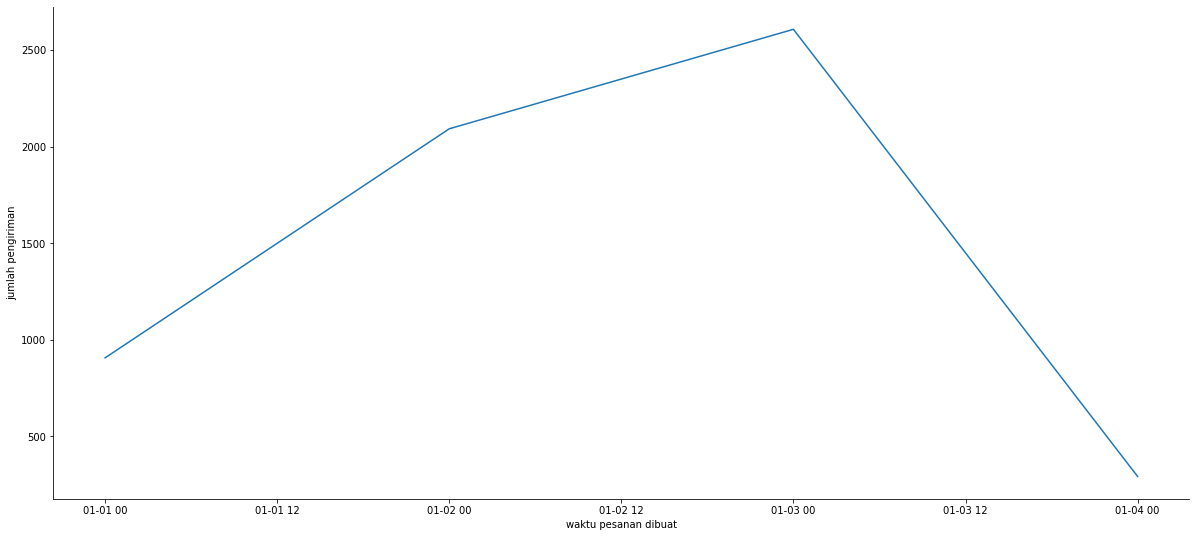

In [153]:
# Plot
g=sns.relplot(x="waktu pesanan dibuat", y="jumlah pengiriman", kind="line", data=trend)
g.fig.set_size_inches(20,8)

*   Apa nama dan kota hub yang paling mendapatkan banyak jumlah pemesanan?

In [156]:
hub = df_join2.groupby(['hub_name', 'hub_city'])['order_amount'].sum().reset_index()
hub = hub.sort_values(by='order_amount', ascending=False)
hub.head()

,hub_name,hub_city,order_amount
6,GOLDEN SHOPPING,RIO DE JANEIRO,73918.47
3,COFFEE SHOPPING,SÃO PAULO,48989.39
10,PAGODE SHOPPING,SÃO PAULO,46591.37
22,SUBWAY SHOPPING,SÃO PAULO,41925.02
11,PEOPLE SHOPPING,RIO DE JANEIRO,32803.79


*   Jenis channel apa yang paling banyak terjadi transaksi?

In [155]:
channel = df_join2.groupby('channel_type')['order_id'].count().reset_index()
channel = channel.rename(columns={'order_id': 'jumlah transaksi'}).sort_values(by='jumlah transaksi', ascending=False)
channel

,channel_type,jumlah transaksi
0,MARKETPLACE,5725
1,OWN CHANNEL,176


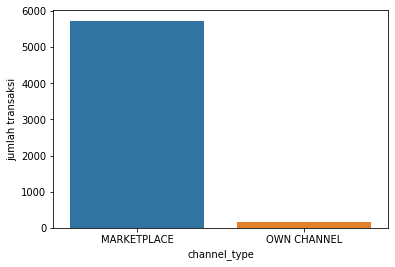

In [159]:
# visualisasi jumlah transaksi tiap channel
sns.barplot(x="channel_type", y="jumlah transaksi", data=channel)

*   Berapa rata-rata jarak tempuh pengiriman?

In [163]:
df_join2['delivery_distance_meters'].dtypes

dtype('float64')

In [164]:
df_join2['delivery_distance_meters'].astype('int64')

0       1035
2       5714
3       5199
4       3746
5        410
        ... 
7573    2409
7574     427
7575    2233
7576     481
7578     589
Name: delivery_distance_meters, Length: 5901, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


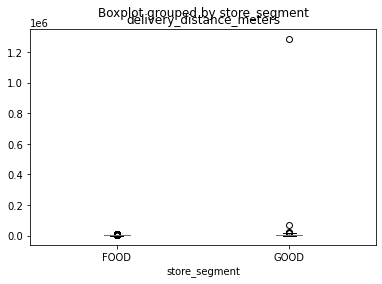

In [161]:
df_join2.boxplot(by ='store_segment', column =['delivery_distance_meters'], grid = False)

In [171]:
round(df_join2['delivery_distance_meters'].describe())

count     5900.0
mean      2370.0
std       1856.0
min         21.0
25%       1135.0
50%       2005.0
75%       3312.0
max      69333.0
Name: delivery_distance_meters, dtype: float64

In [169]:
df_join2 = df_join2.loc[df_join2['delivery_distance_meters']!=df_join2['delivery_distance_meters'].max()]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


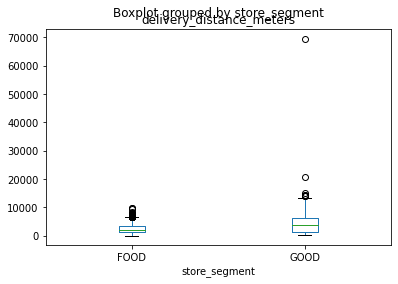

In [170]:
df_join2.boxplot(by ='store_segment', column =['delivery_distance_meters'], grid = False)

In [173]:
round(df_join2['delivery_distance_meters'].describe())

count     5900.0
mean      2370.0
std       1856.0
min         21.0
25%       1135.0
50%       2005.0
75%       3312.0
max      69333.0
Name: delivery_distance_meters, dtype: float64

In [178]:
jarak_tempuh = round(df_join2['delivery_distance_meters'].mean())
print("Rata-rata jarak tempuh pengiriman sejauh {} meter".format(jarak_tempuh))

Rata-rata jarak tempuh pengiriman sejauh 2370 meter


*   Berapakah nilai pesanan / store berdasarkan (min, max, avg, std)?

In [160]:
store_amount = df_join2.groupby('store_id')['order_amount'].sum().reset_index()
store_amount['order_amount'].describe()

count      207.000000
mean      2731.787053
std       5848.575045
min         15.000000
25%        224.220000
50%        653.000000
75%       2363.745000
max      41960.650000
Name: order_amount, dtype: float64

*   Top 3 store di segmen food dan good

In [115]:
top_store = df_join2.groupby(['store_name', 'store_segment'])['order_amount'].sum().reset_index()
top_store = top_store.sort_values(by='order_amount', ascending=False)
food = top_store[top_store['store_segment'] == 'FOOD'].head()
food

,store_name,store_segment,order_amount
43,IUMPICA,FOOD,286745.24
39,IPUPIEMAI,FOOD,51516.65
65,PAPA SUCIS,FOOD,21960.80
76,PIGUE PIPACO,FOOD,10684.90
97,RC OUMILEES,FOOD,9334.90


In [117]:
good = top_store[top_store['store_segment'] == 'GOOD'].head()
good

,store_name,store_segment,order_amount
56,MUMRIFAM,GOOD,2392.90
13,CISI PIUEUEMI,GOOD,1206.49
125,VACMIR ZUGI,GOOD,1175.00
48,LUVAES,GOOD,1117.03
15,CZALLA PUIMS,GOOD,939.94


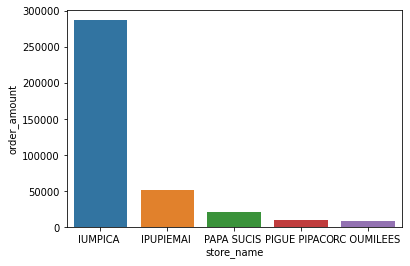

In [116]:
sns.barplot(x="store_name", y="order_amount", data=food)

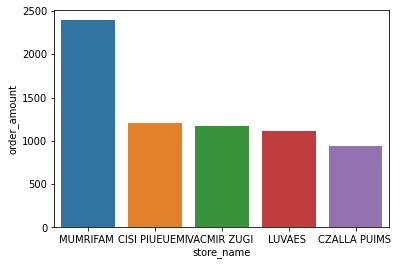

In [118]:
sns.barplot(x="store_name", y="order_amount", data=good)

*   Berapa prosentase jumlah pesanan good dan order?

In [126]:
amount = df_join2.groupby('store_segment')['order_amount'].sum()
prosentase = amount.div(df_join2['order_amount'].sum())*100
prosentase

store_segment
FOOD    97.765705
GOOD     2.234295
Name: order_amount, dtype: float64

*   Bagaimana persebaran driver type berdasarkan driver modal?

In [134]:
df_join2.groupby('driver_modal')['driver_type'].describe()

,count,unique,top,freq
driver_modal,,,,
BIKER,1751,1,FREELANCE,1751
MOTOBOY,4150,2,FREELANCE,2541


## REKOMENDASI

Untuk scaling up transaksi dan pemesanan, dapat memprioritaskan layanan operasional dalam channel marketplace dan segment store "food" mengingat performa terbaik kedua varibel.

Begitu juga jenis pengiriman motoboy dan tipe driver freelance.

## KESIMPULAN - Create the story

Selama bulan Januari hingga April 2021, perusahaan memiliki 207 pelanggan dan 668 mitra yang aktif.

Pada bulan Maret mengalami pengiriman tertinggi sebanyak 2093 dan mengalami penurunan serta jumlah pengiriman terendah pada bulan April 2021 menjadi 293

Dari semua hub yang ada, terdapat 3 hub yang memiliki jumlah pesanan tertinggi:
1. Golden Shopping	di kota Rio de Janeiro dengan jumlah pesanan	73918.47
2. Coffee Shopping	di kota Sao Paulo dengan jumlah pesanan	48989.39
3. Pagode Shopping	di kota Sao Paulo dengan jumlah pesanan	46591.37

Transaksi terbanyak terjadi melalui channel marketplace dengan rincian yaitu channel marketplace sebanyak 5725 transaksi dan own channel sebanyak 176 transaksi

Top 3 store dengan segmen food teratas yaitu:
1. Iumpica	Food	sebesar 286745.24
2. Ipupiemai	Food	sebesar 51516.65
3. Papa Sucis	Food sebesar 21960.80

Sementara top 3 untuk semgmen good teratas yaitu:
1. Mumfiram	Good	2392.90
2. Cisi Piueuemi Good	1206.49
3. Vacmir Zugi	Good	1175.00

Pemesanan kategori food memiliki jumlah yang dominan dengan yaitu Food sebesar 97,77% dan Good 2.23%

Jenis pengiriman paling banyak yaitu motoboy sebanyak 4150 daripada biker sebanyak 1751 dengan tipe driver paling banyak yaitu tipe freelance

Rata-rata jarak tempuh pengiriman sejauh 2370 meter